In [3]:
# !pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 730.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/9.7 MB 730.2 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.7 MB 799.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.7 MB 838.4 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.7 MB 882.6 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.7 MB 882.6 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.7 MB 856.1 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.7 MB 853.0 kB/s eta 0:00:10
   ------- --------------------

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import os
import requests

In [101]:
# Опции для Chrome
options = webdriver.ChromeOptions()
options.add_argument("--ignore-certificate-errors")
options.add_argument("--allow-insecure-localhost")

driver = webdriver.Chrome(options=options)

In [103]:
try:
    # Переход на сайт
    driver.get("https://www.riatomsk.ru/novosti")

    # Прокликивание кнопки "Далее" n-раз
    for _ in range(2):
        try:
            button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CLASS_NAME, "nextLink"))
            )
            button.click()
            time.sleep(2)  # время ожидания 2 секунды
        except Exception as e:
            print(f"Ошибка при нажатии кнопки: {e}")
            break

    # Получение ссылок на новости
    time.sleep(2)  # Дополнительная пауза для полной загрузки страницы
    soup = BeautifulSoup(driver.page_source, "html.parser")
    news_links = []

    # Поиск всех новостей на странице
    articles = soup.find_all("a", class_="rubNewItem")

    if articles:
        for article in articles:
            link = article.get("href")  # Получаем атрибут 'href' напрямую
            if link:  # Проверяем, что ссылка существует
                if not link.startswith("http"):
                    link = "https://www.riatomsk.ru" + link
                news_links.append(link)
                print(f"Собрана ссылка: {link}")
    else:
        print("Не удалось найти статьи на странице.")

    # # Запись ссылок в файл
    # if news_links:
    #     try:
    #         with open("news_links.txt", "w", encoding="utf-8") as file:
    #             for link in news_links:
                    
    #                 file.write(link + "\n")
    #         print("Ссылки на новости успешно записаны в news_links.txt.")
    #     except Exception as e:
    #         print(f"Ошибка при записи в файл: {e}")
    # else:
    #     print("Ссылки не были найдены для записи.")

except Exception as e:
    print(f"Произошла ошибка: {e}")

finally:
    driver.quit()  # Закрытие браузера

Собрана ссылка: https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/rebenok-pogib-vipav-iz-okna-vosjmogo-etazha-mnogoetazhki-v-tomske/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/novoe-kladbische-seversk-stroiteljstvo/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/poteryavshiesya-strelki-orientiri-les-tomsk/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/vipusknik-tgu-stal-poslom/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/bezrabotnie-tomskaya-oblastj-statistika/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/klyajn-podal-zhalobu-v-verhovnij-sud/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/tnimc-novorozhdennie-skrining-sibirj/
Собрана ссылка: https://www.riatomsk.ru/article/20241127/pogoda-tomsk/
Собрана ссылка: https://www.riatomsk.ru/article/20241126/dom-za-rublj-krasnoarmejskaya-75-tomsk/
Собрана ссылка: https://www.riatomsk.ru/article

In [105]:
# Запись ссылок в файл
if news_links:
    try:
        with open("news_links.txt", "w", encoding="utf-8") as file:
            for link in news_links:
                if int(link[32:40]) >=20241119:
                    file.write(link + "\n")
        print("Ссылки на новости успешно записаны в news_links.txt.")
    except Exception as e:
        print(f"Ошибка при записи в файл: {e}")
else:
    print("Ссылки не были найдены для записи.")

Ссылки на новости успешно записаны в news_links.txt.


In [3]:
with open("news_links.txt", "r", encoding="utf-8") as file:
    links = file.readlines()

In [49]:
type(links)

list

In [5]:
import requests as req
import re #регулярные выражения
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup #парсер

In [11]:
# Копирование информации из ссылки по заголовкам
info = [] 

i = 0

for link in links:
    print(link)
    link = link.strip()
    if str(req.get(links[i])) != '<Response [404]>':
        i = i + 1
        response = req.get(link)
        soup1 = BeautifulSoup(response.text, 'html.parser')

        # extracted_text = ''.join([j.text for j in soup1.find("div", class_="statAbout")])
        # text = re.sub('^([^.]\D+[^.]+\.\s)', "", extracted_text)
        # text = str(text.split('\n')[1:])

        text = (
                        soup1.find("div", class_="statAbout").text.strip()
                        if soup1.find("div", class_="statAbout")
                        else "Нет текста новости"
                    )

        # date = soup1.find("span", id_ = "ctl00_InfoPlaceHolder_DateLabel")   #.text  
        # date = date[:16].split(' ')[0]
        # time = soup1.find("span", id_ = "ctl00_InfoPlaceHolder_TimeLabel")   #.text
        # time = time[0:5]
        # date = ' '.join(date)  font-size: 16px; margin-top: 10px;
        date = soup1.find("div", style= "font-size: 16px; margin-top: 10px;").text
        # time, date = date[:5].split(' ')[0], date[:20].split(' ')[1]
        time, date = date[:5], date[5:40]


        # article_tags = soup1.find("div", class_="info")
        # tags = [tag.text for tag in article_tags.find_all("a", class_="tag")] if article_tags else []

    #     title_div = soup1.find("div", class_="article__title")
        title_h1 = soup1.find("div", class_="statInfoName")

        # if title_h1:
        title = title_h1.text.strip()
        # lead = soup1.find("h1", class_="article__second-title").text.strip() if soup1.find("h1", class_="article__second-title") else ""
        print(link, title, text, time, date, sep = "\n")
        info.append({"url": link, "title": title, "text": text, "time": time, "date": date})
        # else:
        #     info.append({"url": link, "title": None, "text": None, "time": None, "date": None})
    else:
        i = i + 1

https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/

https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/
Более 12 тыс ИП и ООО открыто в Сибири через сервис Сбера в 2024г
ТОМСК,
27 ноя – РИА Томск. Больше 12 тысяч
новых бизнесов открылось в Сибири с помощью сервиса регистрации бизнеса и
дистанционного открытия счета Сбера за 10 месяцев 2024 года, сообщила
пресс-служба банка в среду."В
первые 10 месяцев 2024 года в Сибири по упрощенной схеме было открыто больше 12
тысяч новых бизнесов. Такое число ИП и ООО было зарегистрировано в регионах
присутствия Сибирского банка Сбербанка с помощью сервиса регистрации бизнеса и
дистанционного открытия счета", – сказано в сообщении.Добавляется,
что половина регистраций пришлась на Новосибирскую область, Красноярский и
Алтайский края. Еще треть – на Омскую, Кемеровскую и Томскую области.Чаще
всего сибиряки открывают предприятия розничной торговли, в том числе
ориентированные на работу через маркетплейсы. По

KeyboardInterrupt: 

In [136]:
info

[{'url': 'https://www.riatomsk.ru/article/20241127/sber-servis-registracii-biznesa/',
  'title': 'Более 12 тыс ИП и ООО открыто в Сибири через сервис Сбера в 2024г',
  'text': 'ТОМСК,\r\n27 ноя – РИА Томск.\xa0Больше 12 тысяч\r\nновых бизнесов открылось в Сибири с помощью сервиса регистрации бизнеса и\r\nдистанционного открытия счета Сбера за 10 месяцев 2024 года, сообщила\r\nпресс-служба банка в среду."В\r\nпервые 10 месяцев 2024 года в Сибири по упрощенной схеме было открыто больше 12\r\nтысяч новых бизнесов. Такое число ИП и ООО было зарегистрировано в регионах\r\nприсутствия Сибирского банка Сбербанка с помощью сервиса регистрации бизнеса и\r\nдистанционного открытия счета", – сказано в сообщении.Добавляется,\r\nчто половина регистраций пришлась на Новосибирскую область, Красноярский и\r\nАлтайский края. Еще треть – на Омскую, Кемеровскую и Томскую области.Чаще\r\nвсего сибиряки открывают предприятия розничной торговли, в том числе\r\nориентированные на работу через маркетплейсы. П

In [138]:
import pandas as pd
df = pd.DataFrame(info)

In [140]:
print(str(df['text'][1]))

ТОМСК, 27 ноя – РИА Томск. Четырехлетний мальчик погиб, выпав из окна многоэтажки на улице Энтузиастов в Томске; возбуждено уголовное дело, прокуратура проводит проверку, сообщила в среду пресс-служба регионального ведомства.Уточняется, что трагедия произошла вечером во вторник, 26 ноября. "Из окна квартиры, расположенной на восьмом этаже многоквартирного жилого дома по улице Энтузиастов в городе Томске, выпал четырехлетний мальчик. От полученных телесных повреждений ребенок скончался", – говорится в сообщении.Прокуратура Октябрьского района Томска проводит проверку. Кроме того, в связи с гибелью ребенка было возбуждено уголовное дело по части первой статьи "Причинение смерти по неосторожности".


In [142]:
# Запись скопированного датафрейма в файл
df.to_csv(r'RIA_articles_2024.csv', index= False )

## Preprocessing

In [16]:
import nltk
import pandas as pd

In [17]:
df = pd.read_csv(r"RIA_Tomsk_novosti.csv", encoding='UTF-16')

In [18]:
df

Unnamed: 0                                               link  \
0              0  https://www.riatomsk.ru/article/20231225/tomsk...   
1              1    https://www.riatomsk.ru/article/20231225/68920/   
2              2    https://www.riatomsk.ru/article/20231225/68916/   
3              3  https://www.riatomsk.ru/article/20231225/tomsk...   
4              4  https://www.riatomsk.ru/article/20231225/obldu...   
...          ...                                                ...   
5201        5201  https://www.riatomsk.ru/article/20230101/chto-...   
5202        5202  https://www.riatomsk.ru/article/20230101/chto-...   
5203        5203  https://www.riatomsk.ru/article/20230101/kak-b...   
5204        5204  https://www.riatomsk.ru/article/20230101/pogod...   
5205        5205  https://www.riatomsk.ru/article/20230103/filjm...   

                    date   time  \
0     25 декабря 2023 г.  13:39   
1     25 декабря 2023 г.  13:05   
2     25 декабря 2023 г.  11:45   
3     25 декабря 2023 г.   9:24   
4     25 декабря 2023 г.   8:51   
...                  ...    ...   
5201    1 января 2023 г.  14:24   
5202    1 января 2023 г.  12:03   
5203    1 января 2023 г.  10:07   
5204    1 января 2023 г.   8:00   
5205  31 декабря 2022 г.  16:36   

                                                  title  \
0     \r\n                            Томские власти...   
1     \r\n                            Замглавы томск...   
2     \r\n                            Бюджет Томской...   
3     \r\n                            Томские компан...   
4     \r\n                            Облдума примет...   
...                                                 ...   
5201  \r\n                            Новый мэр, нов...   
5202  \r\n                            Пенсии выше, а...   
5203  \r\n                            Как будут рабо...   
5204  \r\n                            Первый день но...   
5205  \r\n                            Топ-10 оригина...   

                                                   text  \
0     ТОМСК, 25 дек – РИА Томск. Власти Томской обла...   
1     ТОМСК,\r\n25 дек – РИА Томск. Советский районн...   
2     ТОМСК, 25 дек – РИА Томск. Томская облдума в п...   
3     ТОМСК, 25 дек – РИА Томск. Работающие в Томско...   
4     ТОМСК, 25 дек – РИА Томск.\r\nДепутаты Законод...   
...                                                 ...   
5201  ТОМСК, 1 янв – РИА Томск. После довольно нервн...   
5202  ТОМСК, 1 янв – РИА Томск. Появление новых госу...   
5203  ТОМСК, 1 янв – РИА Томск.\r\nТорговые центры Т...   
5204  ТОМСК, 1 янв – РИА Томск. Температура воздуха ...   
5205  ТОМСК, 31 дек – РИА Томск. "Крепкий орешек", "...   

                          author  
0     Планкина Евгения Андреевна  
1              Мазуров Александр  
2     Планкина Евгения Андреевна  
3                Семенов Алексей  
4     Планкина Евгения Андреевна  
...                          ...  
5201        Анкудинова Валентина  
5202        Анкудинова Валентина  
5203             Семенов Алексей  
5204        Анкудинова Валентина  
5205        Анкудинова Валентина  

[5206 rows x 7 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5206 non-null   int64 
 1   link        5206 non-null   object
 2   date        5206 non-null   object
 3   time        5206 non-null   object
 4   title       5206 non-null   object
 5   text        5206 non-null   object
 6   author      5091 non-null   object
dtypes: int64(1), object(6)
memory usage: 284.8+ KB


In [20]:
df['prep']=df['text']

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/marson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Импорт стоп-слов + функция, которая удаляет их
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('russian'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Применим функцию удаления стоп-слов
# df["text_stop"] = df["text_punct"].apply(stopwords)
print(STOPWORDS)

{'мой', 'перед', 'нас', 'было', 'меня', 'ему', 'со', 'ничего', 'ж', 'я', 'тебя', 'будто', 'при', 'всех', 'ты', 'до', 'уж', 'и', 'вам', 'они', 'сейчас', 'не', 'эту', 'про', 'зачем', 'хоть', 'под', 'наконец', 'все', 'в', 'совсем', 'этой', 'здесь', 'нее', 'какая', 'разве', 'два', 'вдруг', 'кто', 'конечно', 'она', 'того', 'или', 'какой', 'об', 'всегда', 'себя', 'были', 'больше', 'чтоб', 'через', 'сам', 'этом', 'нет', 'чуть', 'тогда', 'во', 'ней', 'моя', 'можно', 'них', 'где', 'много', 'вот', 'лучше', 'чем', 'один', 'с', 'вы', 'тут', 'иногда', 'если', 'даже', 'три', 'по', 'у', 'к', 'его', 'тоже', 'себе', 'чтобы', 'куда', 'свою', 'потом', 'над', 'ли', 'но', 'за', 'им', 'что', 'вас', 'эти', 'потому', 'еще', 'а', 'хорошо', 'то', 'всего', 'там', 'на', 'для', 'как', 'нельзя', 'же', 'уже', 'бы', 'от', 'этот', 'он', 'теперь', 'может', 'чего', 'раз', 'этого', 'после', 'никогда', 'такой', 'их', 'впрочем', 'был', 'ну', 'ним', 'надо', 'ей', 'да', 'почти', 'когда', 'так', 'быть', 'нибудь', 'ни', 'тот',

In [24]:
# Все в нижний регистр, удаление стоп-слов
df['prep'] = (
    df['prep']
    .str.lower()  # В нижний регистр
    .str.replace(r'[^\w\s]', '', regex=True)  # Удаляем все символы, кроме букв и пробелов
    .apply(remove_stopwords)  # Удаляем стоп-слова
)

# Вывод первых строк
print(df['prep'].head())

0    томск 25 дек риа томск власти томской области ...
1    томск 25 дек риа томск советский районный суд ...
2    томск 25 дек риа томск томская облдума понедел...
3    томск 25 дек риа томск работающие томской обла...
4    томск 25 дек риа томск депутаты законодательно...
Name: prep, dtype: object


In [25]:
df

Unnamed: 0                                               link  \
0              0  https://www.riatomsk.ru/article/20231225/tomsk...   
1              1    https://www.riatomsk.ru/article/20231225/68920/   
2              2    https://www.riatomsk.ru/article/20231225/68916/   
3              3  https://www.riatomsk.ru/article/20231225/tomsk...   
4              4  https://www.riatomsk.ru/article/20231225/obldu...   
...          ...                                                ...   
5201        5201  https://www.riatomsk.ru/article/20230101/chto-...   
5202        5202  https://www.riatomsk.ru/article/20230101/chto-...   
5203        5203  https://www.riatomsk.ru/article/20230101/kak-b...   
5204        5204  https://www.riatomsk.ru/article/20230101/pogod...   
5205        5205  https://www.riatomsk.ru/article/20230103/filjm...   

                    date   time  \
0     25 декабря 2023 г.  13:39   
1     25 декабря 2023 г.  13:05   
2     25 декабря 2023 г.  11:45   
3     25 декабря 2023 г.   9:24   
4     25 декабря 2023 г.   8:51   
...                  ...    ...   
5201    1 января 2023 г.  14:24   
5202    1 января 2023 г.  12:03   
5203    1 января 2023 г.  10:07   
5204    1 января 2023 г.   8:00   
5205  31 декабря 2022 г.  16:36   

                                                  title  \
0     \r\n                            Томские власти...   
1     \r\n                            Замглавы томск...   
2     \r\n                            Бюджет Томской...   
3     \r\n                            Томские компан...   
4     \r\n                            Облдума примет...   
...                                                 ...   
5201  \r\n                            Новый мэр, нов...   
5202  \r\n                            Пенсии выше, а...   
5203  \r\n                            Как будут рабо...   
5204  \r\n                            Первый день но...   
5205  \r\n                            Топ-10 оригина...   

                                                   text  \
0     ТОМСК, 25 дек – РИА Томск. Власти Томской обла...   
1     ТОМСК,\r\n25 дек – РИА Томск. Советский районн...   
2     ТОМСК, 25 дек – РИА Томск. Томская облдума в п...   
3     ТОМСК, 25 дек – РИА Томск. Работающие в Томско...   
4     ТОМСК, 25 дек – РИА Томск.\r\nДепутаты Законод...   
...                                                 ...   
5201  ТОМСК, 1 янв – РИА Томск. После довольно нервн...   
5202  ТОМСК, 1 янв – РИА Томск. Появление новых госу...   
5203  ТОМСК, 1 янв – РИА Томск.\r\nТорговые центры Т...   
5204  ТОМСК, 1 янв – РИА Томск. Температура воздуха ...   
5205  ТОМСК, 31 дек – РИА Томск. "Крепкий орешек", "...   

                          author  \
0     Планкина Евгения Андреевна   
1              Мазуров Александр   
2     Планкина Евгения Андреевна   
3                Семенов Алексей   
4     Планкина Евгения Андреевна   
...                          ...   
5201        Анкудинова Валентина   
5202        Анкудинова Валентина   
5203             Семенов Алексей   
5204        Анкудинова Валентина   
5205        Анкудинова Валентина   

                                                   prep  
0     томск 25 дек риа томск власти томской области ...  
1     томск 25 дек риа томск советский районный суд ...  
2     томск 25 дек риа томск томская облдума понедел...  
3     томск 25 дек риа томск работающие томской обла...  
4     томск 25 дек риа томск депутаты законодательно...  
...                                                 ...  
5201  томск 1 янв риа томск довольно нервного 2022 г...  
5202  томск 1 янв риа томск появление новых государс...  
5203  томск 1 янв риа томск торговые центры томска в...  
5204  томск 1 янв риа томск температура воздуха мину...  
5205  томск 31 дек риа томск крепкий орешек дома реа...  

[5206 rows x 8 columns]

In [30]:
#!pip install pymystem3

In [31]:
import pymystem3
from pymystem3 import Mystem as mystem

In [32]:
# Лемматизация
df_prep = df['prep']
m = mystem()
i = 0
for articles in df_prep:
    # df['lemmas'][i] = ''.join(m.lemmatize(articles))
    df_prep.loc[i] = ''.join(m.lemmatize(articles))
    i += 1



print(df_prep)

/tmp/ipykernel_9636/240655082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = ''.join(m.lemmatize(articles))
/tmp/ipykernel_9636/240655082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = ''.join(m.lemmatize(articles))
/tmp/ipykernel_9636/240655082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = ''.join(m.lemmatize(articles))
/tmp/ipykernel_9636/240655082.py:7: SettingWithCo

0       томск 25 дека риа томск власть томский область...
1       томск 25 дека риа томск советский районный суд...
2       томск 25 дека риа томск томский облдума понеде...
3       томск 25 дека риа томск работать томский облас...
4       томск 25 дека риа томск депутат законодательны...
                              ...                        
5201    томск 1 янва риа томск довольно нервный 2022 г...
5202    томск 1 янва риа томск появление новый государ...
5203    томск 1 янва риа томск торговый центр томск вр...
5204    томск 1 янва риа томск температура воздух мину...
5205    томск 31 дека риа томск крепкий орешек дома ре...
Name: prep, Length: 5206, dtype: object


/tmp/ipykernel_9636/240655082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = ''.join(m.lemmatize(articles))
/tmp/ipykernel_9636/240655082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = ''.join(m.lemmatize(articles))
/tmp/ipykernel_9636/240655082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = ''.join(m.lemmatize(articles))
/tmp/ipykernel_9636/240655082.py:7: SettingWithCo

In [33]:
word_list = {"томск", "томский", "томич", "томичи", "томичка", "голубев", "масляева", "соколов", "мазуров", "мазур", "прошкина", "планкина", "матвиевский", "риа", "томск", "агентство", "миллион", "год", "сообщаться", "ранее", "сообщалось", "сообщать", "скр", "прокуратура", "администрация", "мэрия", "мэрии", "департамент", "пресс-службы", "пресс-служб", "пресс-служба", "область", "журналист", "корреспондент", "сообщать", "это", "который", "рубль", "также", "сообщать", "отмечается", "день", "весь", "томск", "регион", "тысяча", "свой", "россия", "бюджет", "вопрос", "рассказывать", "время", "комитет", "проводить", "добавлять", "около", "рф", "уточнять", "слово", "настоящий", "должный", "место", "вторник", "павел", "понедельник", "региональный", "вячеслав", "сайт", "пятница", "решение", "редакция", "полиция", "город", "улица", "месяц", "из-за", "мочь", "январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь", "янв", "фев", "мар", "апр", "май", "июн", "июл", "авг", "сен", "окт", "ноя", "дектябрь", "апр", "мар", "май", "июн", "июл", "авг", "сен", "окт", "ноя", "фев", "янв", "дек", "риа", "погода", "понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье", "декабрь", "январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "прояснение", "погода", "тепло", "регион", "нуль", "гроза", "возможный", "осадки", "небольшой", "гидрометцентр", "синоптик", "воздух", "региональный", "дождь", "снег", "порыв", "минус", "плюс", "ожидаться", "ветер", "секунда", "температура", "место", "метр", "день", "градус"}

In [34]:
# Новый список стоп-слов + функция их удаления
# STOPWORDS = set(stopwords.words('russian'))
STOPWORDS_1 = STOPWORDS.union(word_list)
def stopwords_1(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS_1])
# Применим функцию удаления стоп-слов
# df["text_stop"] = df["text_punct"].apply(stopwords)
print(STOPWORDS_1)

{'мой', 'перед', 'из-за', 'нас', 'было', 'отмечается', 'весь', 'скр', 'дек', 'меня', 'ему', 'со', 'ничего', 'ж', 'слово', 'сентябрь', 'я', 'фев', 'тебя', 'будто', 'региональный', 'город', 'при', 'рубль', 'год', 'всех', 'ты', 'до', 'уж', 'и', 'вам', 'они', 'погода', 'сейчас', 'редакция', 'гроза', 'не', 'октябрь', 'эту', 'про', 'зачем', 'июнь', 'февраль', 'хоть', 'понедельник', 'под', 'наконец', 'градус', 'прояснение', 'тепло', 'все', 'сайт', 'в', 'совсем', 'апрель', 'уточнять', 'пресс-службы', 'рассказывать', 'янв', 'декабрь', 'улица', 'также', 'этой', 'ветер', 'здесь', 'четверг', 'нее', 'какая', 'разве', 'два', 'вдруг', 'пресс-служб', 'сен', 'время', 'кто', 'конечно', 'она', 'того', 'или', 'ноябрь', 'какой', 'об', 'всегда', 'себя', 'матвиевский', 'были', 'больше', 'чтоб', 'через', 'сам', 'этом', 'нет', 'секунда', 'томич', 'чуть', 'проводить', 'добавлять', 'тогда', 'во', 'ней', 'моя', 'можно', 'день', 'них', 'март', 'где', 'прокуратура', 'много', 'вот', 'лучше', 'мазуров', 'мазур', 'чем

In [35]:
import re

In [37]:
# Удаление всех небуквенных символов
i = 0
for lists in df_prep:
    # df['stop_num'][i] = re.sub(r'[^\w\s]+|[\d]+', '', lists) #.strip()
    df_prep.loc[i] = re.sub(r'[^\w\s\r]+|[\d]+', '', lists) #.replace('r','') 
    i += 1

# h = 0
# for lists in df_prep:   
#     # for word in lists:
#     #     if word == 'r':
#     df_prep.loc[h] = lists.replace('r', '')

df_prep

/tmp/ipykernel_9636/2420976292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = re.sub(r'[^\w\s\r]+|[\d]+', '', lists) #.replace('r','')
/tmp/ipykernel_9636/2420976292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = re.sub(r'[^\w\s\r]+|[\d]+', '', lists) #.replace('r','')
/tmp/ipykernel_9636/2420976292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep.loc[i] = re.sub(r'[^\w\s\r]+|[\d]+

0       томск  дека риа томск власть томский область р...
1       томск  дека риа томск советский районный суд т...
2       томск  дека риа томск томский облдума понедель...
3       томск  дека риа томск работать томский область...
4       томск  дека риа томск депутат законодательный ...
                              ...                        
5201    томск  янва риа томск довольно нервный  год сп...
5202    томск  янва риа томск появление новый государс...
5203    томск  янва риа томск торговый центр томск вре...
5204    томск  янва риа томск температура воздух минус...
5205    томск  дека риа томск крепкий орешек дома реал...
Name: prep, Length: 5206, dtype: object

In [38]:
df_prep.to_csv(r'RIA_articles_prep.csv', index= False )

## Токенизация

In [39]:
df_tf = pd.read_csv(r"RIA_articles_prep.csv", encoding='UTF-8')

In [40]:
df_tf

prep
0     томск  дека риа томск власть томский область р...
1     томск  дека риа томск советский районный суд т...
2     томск  дека риа томск томский облдума понедель...
3     томск  дека риа томск работать томский область...
4     томск  дека риа томск депутат законодательный ...
...                                                 ...
5201  томск  янва риа томск довольно нервный  год сп...
5202  томск  янва риа томск появление новый государс...
5203  томск  янва риа томск торговый центр томск вре...
5204  томск  янва риа томск температура воздух минус...
5205  томск  дека риа томск крепкий орешек дома реал...

[5206 rows x 1 columns]

In [41]:
from nltk.tokenize import RegexpTokenizer

In [42]:
# Токенизация - нужно для разбиения строки по пробелам на список слов
all_texts = []
# df['text_prep'] = df['stop_num']
tokenizer = RegexpTokenizer(r'\w+')

i = 0
for texts in df_tf['prep']:
    df_tf.prep[i] = tokenizer.tokenize(str(texts))
    all_texts.extend(df_tf.prep[i])
    i += 1
all_texts   

/tmp/ipykernel_9636/855474328.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf.prep[i] = tokenizer.tokenize(str(texts))


['томск',
 'дека',
 'риа',
 'томск',
 'власть',
 'томский',
 'область',
 'рассматривать',
 'вариант',
 'сокращение',
 'расход',
 'открытие',
 'вытрезвитель',
 'счет',
 'использование',
 'иметься',
 'площадь',
 'речь',
 'идти',
 'помещение',
 'томский',
 'наркодиспансер',
 'улица',
 'рабочий',
 'сообщать',
 'понедельник',
 'м',
 'собрание',
 'облдума',
 'замначальник',
 'облздрав',
 'владимир',
 'мартынов',
 'ранее',
 'сообщаться',
 'власть',
 'регион',
 'планировать',
 'создавать',
 'томск',
 'год',
 'вытрезвитель',
 'койка',
 'открытие',
 'содержание',
 'потребоваться',
 'мало',
 'миллион',
 'рубль',
 'ежегодный',
 'расход',
 'составлять',
 'мало',
 'миллион',
 'рубль',
 'понедельник',
 'облдума',
 'мартынов',
 'сообщать',
 'власть',
 'рассматривать',
 'вариант',
 'открывать',
 'вытрезвитель',
 'база',
 'томский',
 'областной',
 'наркологический',
 'диспансер',
 'улица',
 'рабочий',
 'особый',
 'требование',
 'создание',
 'такой',
 'организация',
 'роспотребнадзор',
 'сомнение',
 'нап

In [43]:
df_tf

prep
0     [томск, дека, риа, томск, власть, томский, обл...
1     [томск, дека, риа, томск, советский, районный,...
2     [томск, дека, риа, томск, томский, облдума, по...
3     [томск, дека, риа, томск, работать, томский, о...
4     [томск, дека, риа, томск, депутат, законодател...
...                                                 ...
5201  [томск, янва, риа, томск, довольно, нервный, г...
5202  [томск, янва, риа, томск, появление, новый, го...
5203  [томск, янва, риа, томск, торговый, центр, том...
5204  [томск, янва, риа, томск, температура, воздух,...
5205  [томск, дека, риа, томск, крепкий, орешек, дом...

[5206 rows x 1 columns]

## Plots

In [53]:
# Удаление из списка слов, которые вошли в стоп-слова


# add_stopwords = ['nan', 'r']
all_texts_1 = [token.strip() for token in all_texts if token not in STOPWORDS_1]
add_stopwords = ['nan', 'r', 'ной']
all_texts_2 = [token.strip() for token in all_texts_1 if token not in add_stopwords]

In [54]:
# Подсчет вхождений слов

from nltk.probability import FreqDist
fdist = FreqDist(all_texts_2)
fdist

FreqDist({'работа': 4046, 'проект': 3402, 'человек': 2990, 'проходить': 2721, 'новый': 2620, 'сообщение': 2551, 'прессслужба': 2439, 'район': 2379, 'компания': 2341, 'первый': 2329, ...})

In [55]:
fdist.most_common(5)

[('работа', 4046),
 ('проект', 3402),
 ('человек', 2990),
 ('проходить', 2721),
 ('новый', 2620)]

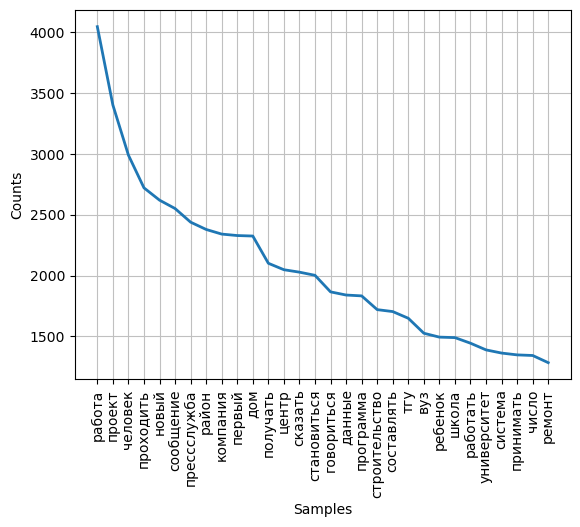

<Axes: xlabel='Samples', ylabel='Counts'>

In [56]:
fdist.plot(30,cumulative=False)

In [48]:
# !pip install wordcloud

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
text_raw = " ".join(all_texts_2)

In [70]:
wordcloud = WordCloud(background_color='white', width=1400, height=1000).generate(text_raw)

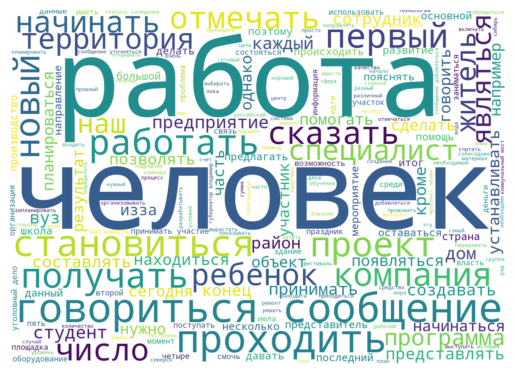

In [71]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
wordcloud.to_file("wordcloud_result.png")

## TF-IDF

In [77]:
# !pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

In [76]:
# Контрольное удаление стоп-слов + преобразование списков обратно в строки
i = 0
add_stopwords = ['nan', 'r', 'ной']
for lists in df_tf['prep']:
    lst = [token.strip() for token in lists if token not in STOPWORDS_1]
    lst_2 = [token.strip() for token in lst if token not in add_stopwords]
    df_tf.prep[i] = ' '.join(lst_2)
    i += 1
print(df_tf)    

/tmp/ipykernel_9636/1875167043.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf.prep[i] = ' '.join(lst_2)


                                                   prep
0     дека власть рассматривать вариант сокращение р...
1     дека советский районный суд приговаривать заме...
2     дека облдума окончательный чтение принимать до...
3     дека работать компания нуждаться новый сотрудн...
4     дека депутат законодательный дума собираться е...
...                                                 ...
5201  янва довольно нервный справедливо сказать новы...
5202  янва появление новый государственный пошлина о...
5203  янва торговый центр каникулы работать особый г...
5204  янва мокрый восточный воскресение данные утро ...
5205  дека крепкий орешек дома реальный любовь ирони...

[5206 rows x 1 columns]


In [77]:
texts = df_tf.prep

In [78]:
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(texts)

In [79]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]

In [80]:
# Вычисление TF-IDF
df1 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

tfidf
вытрезвитель  0.666779
мартынов      0.285762
облдума       0.163487
открытие      0.138075
власть        0.136915
...                ...
йыулуван      0.000000
ка            0.000000
кабак         0.000000
кабальный     0.000000
йоркшир       0.000000

[34244 rows x 1 columns]

In [81]:
df_tf

prep
0     дека власть рассматривать вариант сокращение р...
1     дека советский районный суд приговаривать заме...
2     дека облдума окончательный чтение принимать до...
3     дека работать компания нуждаться новый сотрудн...
4     дека депутат законодательный дума собираться е...
...                                                 ...
5201  янва довольно нервный справедливо сказать новы...
5202  янва появление новый государственный пошлина о...
5203  янва торговый центр каникулы работать особый г...
5204  янва мокрый восточный воскресение данные утро ...
5205  дека крепкий орешек дома реальный любовь ирони...

[5206 rows x 1 columns]

In [82]:
df2 = df1.sort_values(by=["tfidf"],ascending=False)

In [83]:
df2

tfidf
вытрезвитель  0.666779
мартынов      0.285762
облдума       0.163487
открытие      0.138075
власть        0.136915
...                ...
йыулуван      0.000000
ка            0.000000
кабак         0.000000
кабальный     0.000000
йоркшир       0.000000

[34244 rows x 1 columns]